In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.initializers import GlorotNormal
import tensorflow.keras.initializers
import matplotlib.pyplot as plt
from tensorflow.keras.activations import linear

In [2]:
def ForwardKinematics(q1,q2,q3, l1=1, l2=0.5, l3=0.25):
    #l1 = 1 
    #l2 = 0.5
    #l3 = 0.25

    #Forward Kinematics 
    X1 = l1*np.cos(q1)
    Y1 = l1*np.sin(q1) 

    X2 = X1 + l2*np.cos(q1+q2)
    Y2 = Y1 + l2*np.sin(q1+q2)

    Xe = X2 + l3*np.cos(q1+q2+q3)
    Ye = Y2 + l3*np.sin(q1+q2+q3)

    Q = q1+q2+q3;

    X0 = 0; 
    Y0 = 0;
    Xfk = [X0, X1, X2, Xe]
    Yfk = [Y0, Y1, Y2, Ye]
    
    return Xfk, Yfk, Q
    

In [13]:
# create the model using sequential Dense layers 
# Sequential model is feedforward neural network
model = Sequential()

# weight initialization method 
initializer = HeUniform()
#initializer = GlorotNormal()
initializer2 = HeUniform()
#initializer = HeNormal()

# add hidden layers and output layer 
model.add(Dense(100, activation = 'tanh', input_shape = (3,), kernel_initializer = initializer)) 
#model.add(Dense(25, activation = 'tanh', kernel_initializer = initializer2))
model.add(Dense(3, activation = 'linear'))

# build model with loss function, optimizer and SGD
model.compile(loss = 'mean_squared_error', optimizer = SGD(learning_rate = 0.0002), metrics = ['accuracy'])

# prints model summary to show model details
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [14]:
# create the model using sequential Dense layers 
# Sequential model is feedforward neural network
modelRnd = Sequential()

# weight initialization method 
initializer = HeUniform()
#initializer = GlorotNormal()
initializer2 = HeUniform()
#initializer = HeNormal()

# add hidden layers and output layer 
modelRnd.add(Dense(100, activation = 'tanh', input_shape = (3,), kernel_initializer = initializer)) 
#model.add(Dense(25, activation = 'tanh', kernel_initializer = initializer2))
modelRnd.add(Dense(3, activation = 'linear'))

# build model with loss function, optimizer and SGD
modelRnd.compile(loss = 'mean_squared_error', optimizer = SGD(learning_rate = 0.0002), metrics = ['accuracy'])

# prints model summary to show model details
modelRnd.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               400       
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


In [15]:
# create the model using sequential Dense layers 
# Sequential model is feedforward neural network
modelLarge = Sequential()

# weight initialization method 
initializer = HeUniform()
#initializer = GlorotNormal()
initializer2 = HeUniform()
#initializer = HeNormal()

# add hidden layers and output layer 
modelLarge.add(Dense(100, activation = 'tanh', input_shape = (3,), kernel_initializer = initializer)) 
modelLarge.add(Dense(25, activation = 'tanh', kernel_initializer = initializer2))
modelLarge.add(Dense(3, activation = 'linear'))

# build model with loss function, optimizer and SGD
modelLarge.compile(loss = 'mean_squared_error', optimizer = SGD(learning_rate = 0.0002), metrics = ['accuracy'])

# prints model summary to show model details
modelLarge.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               400       
                                                                 
 dense_5 (Dense)             (None, 25)                2525      
                                                                 
 dense_6 (Dense)             (None, 3)                 78        
                                                                 
Total params: 3,003
Trainable params: 3,003
Non-trainable params: 0
_________________________________________________________________


In [16]:
# import the input and target data produced from the forward kinematics in MATLAB 
x = []
target = []

# open text file with data to be analyzed
with open('input.txt','r') as file:
# reading each line    
    for line in file:
        # reading each word        
        for word in line.split():
            # append the data array with each word 
            x.append(word)

xtemp = np.reshape(x, (9261,3))
x = xtemp.astype(float)

# open text file with data to be analyzed
with open('target.txt','r') as file:
    # reading each line    
    for line in file:
        # reading each word        
        for word in line.split():
            # append the data array with each word 
            target.append(word)

target = np.reshape(target, (9261, 3))
y = target.astype(float)

In [17]:
# import the input and target data produced from the forward kinematics in MATLAB 
xRnd = []
targetRnd = []
yRnd = []

# open text file with data to be analyzed
with open('inputRnd.txt','r') as file:
# reading each line    
    for line in file:
        # reading each word        
        for word in line.split():
            # append the data array with each word 
            xRnd.append(word)

xtempRnd = np.reshape(xRnd, (9261,3))
xRnd = xtempRnd.astype(float)

# open text file with data to be analyzed
with open('targetRnd.txt','r') as file:
    # reading each line    
    for line in file:
        # reading each word        
        for word in line.split():
            # append the data array with each word 
            targetRnd.append(word)

targetRnd = np.reshape(targetRnd, (9261, 3))
yRnd = targetRnd.astype(float)

In [57]:
# 75/25 train/validation data split 
# split training data set 
trainX, testX, trainY, testY = train_test_split(x, y,  test_size = 0.25, random_state = 1)

maxEpochs = 4000
batchSize = 128

H = model.fit(trainX, trainY, validation_data = (testX, testY), epochs = maxEpochs, batch_size = batchSize)

Epoch 1/4000
55/55 [==============================] - 0s 5ms/step - loss: 0.0753 - accuracy: 0.9434 - val_loss: 0.0775 - val_accuracy: 0.9482
Epoch 2/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9433 - val_loss: 0.0774 - val_accuracy: 0.9482
Epoch 3/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9434 - val_loss: 0.0774 - val_accuracy: 0.9482
Epoch 4/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9434 - val_loss: 0.0774 - val_accuracy: 0.9478
Epoch 5/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9434 - val_loss: 0.0774 - val_accuracy: 0.9478
Epoch 6/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9434 - val_loss: 0.0774 - val_accuracy: 0.9478
Epoch 7/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0752 - accuracy: 0.9438 - val_loss: 0.0773 - val_accuracy: 0.9478
Epoch 

55/55 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9444 - val_loss: 0.0755 - val_accuracy: 0.9482
Epoch 116/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9444 - val_loss: 0.0755 - val_accuracy: 0.9486
Epoch 117/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9443 - val_loss: 0.0755 - val_accuracy: 0.9482
Epoch 118/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9444 - val_loss: 0.0755 - val_accuracy: 0.9478
Epoch 119/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9444 - val_loss: 0.0754 - val_accuracy: 0.9482
Epoch 120/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9444 - val_loss: 0.0754 - val_accuracy: 0.9482
Epoch 121/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0733 - accuracy: 0.9444 - val_loss: 0.0754 - val_accuracy: 0.9478
Epoch 1

Epoch 172/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9446 - val_loss: 0.0746 - val_accuracy: 0.9486
Epoch 173/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9446 - val_loss: 0.0746 - val_accuracy: 0.9486
Epoch 174/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0725 - accuracy: 0.9446 - val_loss: 0.0745 - val_accuracy: 0.9486
Epoch 175/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9447 - val_loss: 0.0745 - val_accuracy: 0.9486
Epoch 176/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9446 - val_loss: 0.0745 - val_accuracy: 0.9486
Epoch 177/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9446 - val_loss: 0.0745 - val_accuracy: 0.9486
Epoch 178/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0724 - accuracy: 0.9446 - val_loss: 0.0745 - val_accuracy:

Epoch 229/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9447 - val_loss: 0.0737 - val_accuracy: 0.9495
Epoch 230/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9449 - val_loss: 0.0737 - val_accuracy: 0.9495
Epoch 231/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9449 - val_loss: 0.0736 - val_accuracy: 0.9495
Epoch 232/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9447 - val_loss: 0.0736 - val_accuracy: 0.9495
Epoch 233/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9449 - val_loss: 0.0736 - val_accuracy: 0.9495
Epoch 234/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9447 - val_loss: 0.0736 - val_accuracy: 0.9495
Epoch 235/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9447 - val_loss: 0.0736 - val_accuracy:

Epoch 286/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9454 - val_loss: 0.0728 - val_accuracy: 0.9495
Epoch 287/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9454 - val_loss: 0.0728 - val_accuracy: 0.9495
Epoch 288/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9451 - val_loss: 0.0727 - val_accuracy: 0.9495
Epoch 289/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9453 - val_loss: 0.0727 - val_accuracy: 0.9495
Epoch 290/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9454 - val_loss: 0.0727 - val_accuracy: 0.9495
Epoch 291/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9454 - val_loss: 0.0727 - val_accuracy: 0.9495
Epoch 292/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9454 - val_loss: 0.0727 - val_accuracy:

Epoch 343/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9454 - val_loss: 0.0719 - val_accuracy: 0.9499
Epoch 344/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9456 - val_loss: 0.0719 - val_accuracy: 0.9499
Epoch 345/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9454 - val_loss: 0.0719 - val_accuracy: 0.9499
Epoch 346/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9456 - val_loss: 0.0719 - val_accuracy: 0.9499
Epoch 347/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9457 - val_loss: 0.0719 - val_accuracy: 0.9499
Epoch 348/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9454 - val_loss: 0.0718 - val_accuracy: 0.9499
Epoch 349/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0698 - accuracy: 0.9456 - val_loss: 0.0718 - val_accuracy:

Epoch 400/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9460 - val_loss: 0.0711 - val_accuracy: 0.9499
Epoch 401/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9459 - val_loss: 0.0710 - val_accuracy: 0.9499
Epoch 402/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9460 - val_loss: 0.0710 - val_accuracy: 0.9499
Epoch 403/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9460 - val_loss: 0.0710 - val_accuracy: 0.9499
Epoch 404/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9460 - val_loss: 0.0710 - val_accuracy: 0.9499
Epoch 405/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9460 - val_loss: 0.0710 - val_accuracy: 0.9499
Epoch 406/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9461 - val_loss: 0.0710 - val_accuracy:

Epoch 457/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9464 - val_loss: 0.0702 - val_accuracy: 0.9516
Epoch 458/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9463 - val_loss: 0.0702 - val_accuracy: 0.9512
Epoch 459/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9464 - val_loss: 0.0702 - val_accuracy: 0.9516
Epoch 460/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9464 - val_loss: 0.0702 - val_accuracy: 0.9516
Epoch 461/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9464 - val_loss: 0.0702 - val_accuracy: 0.9516
Epoch 462/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9463 - val_loss: 0.0702 - val_accuracy: 0.9516
Epoch 463/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9463 - val_loss: 0.0702 - val_accuracy:

Epoch 514/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy: 0.9516
Epoch 515/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy: 0.9516
Epoch 516/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy: 0.9516
Epoch 517/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy: 0.9516
Epoch 518/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy: 0.9516
Epoch 519/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy: 0.9516
Epoch 520/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9469 - val_loss: 0.0694 - val_accuracy:

Epoch 571/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9472 - val_loss: 0.0686 - val_accuracy: 0.9516
Epoch 572/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9473 - val_loss: 0.0686 - val_accuracy: 0.9516
Epoch 573/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9470 - val_loss: 0.0686 - val_accuracy: 0.9516
Epoch 574/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9472 - val_loss: 0.0686 - val_accuracy: 0.9516
Epoch 575/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9470 - val_loss: 0.0686 - val_accuracy: 0.9516
Epoch 576/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9473 - val_loss: 0.0686 - val_accuracy: 0.9516
Epoch 577/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9472 - val_loss: 0.0686 - val_accuracy:

Epoch 628/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9474 - val_loss: 0.0679 - val_accuracy: 0.9512
Epoch 629/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9474 - val_loss: 0.0679 - val_accuracy: 0.9512
Epoch 630/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9474 - val_loss: 0.0678 - val_accuracy: 0.9512
Epoch 631/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9474 - val_loss: 0.0678 - val_accuracy: 0.9516
Epoch 632/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9474 - val_loss: 0.0678 - val_accuracy: 0.9516
Epoch 633/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9474 - val_loss: 0.0678 - val_accuracy: 0.9516
Epoch 634/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9474 - val_loss: 0.0678 - val_accuracy:

Epoch 685/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9476 - val_loss: 0.0671 - val_accuracy: 0.9516
Epoch 686/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9474 - val_loss: 0.0671 - val_accuracy: 0.9516
Epoch 687/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9474 - val_loss: 0.0671 - val_accuracy: 0.9516
Epoch 688/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9474 - val_loss: 0.0671 - val_accuracy: 0.9516
Epoch 689/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9474 - val_loss: 0.0671 - val_accuracy: 0.9516
Epoch 690/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9474 - val_loss: 0.0671 - val_accuracy: 0.9516
Epoch 691/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9474 - val_loss: 0.0670 - val_accuracy:

Epoch 742/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9479 - val_loss: 0.0664 - val_accuracy: 0.9516
Epoch 743/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9479 - val_loss: 0.0664 - val_accuracy: 0.9516
Epoch 744/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9479 - val_loss: 0.0664 - val_accuracy: 0.9516
Epoch 745/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9479 - val_loss: 0.0664 - val_accuracy: 0.9516
Epoch 746/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9479 - val_loss: 0.0663 - val_accuracy: 0.9516
Epoch 747/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9479 - val_loss: 0.0663 - val_accuracy: 0.9516
Epoch 748/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9479 - val_loss: 0.0663 - val_accuracy:

Epoch 799/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9482 - val_loss: 0.0657 - val_accuracy: 0.9521
Epoch 800/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9482 - val_loss: 0.0657 - val_accuracy: 0.9521
Epoch 801/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9482 - val_loss: 0.0657 - val_accuracy: 0.9521
Epoch 802/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9482 - val_loss: 0.0656 - val_accuracy: 0.9521
Epoch 803/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9483 - val_loss: 0.0656 - val_accuracy: 0.9521
Epoch 804/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9482 - val_loss: 0.0656 - val_accuracy: 0.9521
Epoch 805/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9482 - val_loss: 0.0656 - val_accuracy:

Epoch 856/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9487 - val_loss: 0.0650 - val_accuracy: 0.9525
Epoch 857/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9487 - val_loss: 0.0650 - val_accuracy: 0.9525
Epoch 858/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9492 - val_loss: 0.0650 - val_accuracy: 0.9525
Epoch 859/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9492 - val_loss: 0.0649 - val_accuracy: 0.9525
Epoch 860/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9493 - val_loss: 0.0649 - val_accuracy: 0.9525
Epoch 861/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9492 - val_loss: 0.0649 - val_accuracy: 0.9525
Epoch 862/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9492 - val_loss: 0.0649 - val_accuracy:

Epoch 913/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9499 - val_loss: 0.0643 - val_accuracy: 0.9529
Epoch 914/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9499 - val_loss: 0.0643 - val_accuracy: 0.9529
Epoch 915/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9499 - val_loss: 0.0643 - val_accuracy: 0.9529
Epoch 916/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9499 - val_loss: 0.0643 - val_accuracy: 0.9529
Epoch 917/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9499 - val_loss: 0.0642 - val_accuracy: 0.9529
Epoch 918/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9499 - val_loss: 0.0642 - val_accuracy: 0.9529
Epoch 919/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9500 - val_loss: 0.0642 - val_accuracy:

Epoch 970/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9502 - val_loss: 0.0636 - val_accuracy: 0.9529
Epoch 971/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9502 - val_loss: 0.0636 - val_accuracy: 0.9529
Epoch 972/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9502 - val_loss: 0.0636 - val_accuracy: 0.9529
Epoch 973/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9500 - val_loss: 0.0636 - val_accuracy: 0.9529
Epoch 974/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9502 - val_loss: 0.0636 - val_accuracy: 0.9529
Epoch 975/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9502 - val_loss: 0.0636 - val_accuracy: 0.9529
Epoch 976/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9502 - val_loss: 0.0635 - val_accuracy:

Epoch 1027/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9502 - val_loss: 0.0630 - val_accuracy: 0.9529
Epoch 1028/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0613 - accuracy: 0.9502 - val_loss: 0.0630 - val_accuracy: 0.9529
Epoch 1029/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9502 - val_loss: 0.0629 - val_accuracy: 0.9534
Epoch 1030/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9502 - val_loss: 0.0629 - val_accuracy: 0.9534
Epoch 1031/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9502 - val_loss: 0.0629 - val_accuracy: 0.9534
Epoch 1032/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9502 - val_loss: 0.0629 - val_accuracy: 0.9529
Epoch 1033/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9502 - val_loss: 0.0629 - val_ac

55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9503 - val_loss: 0.0617 - val_accuracy: 0.9534
Epoch 1140/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9502 - val_loss: 0.0617 - val_accuracy: 0.9534
Epoch 1141/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9502 - val_loss: 0.0617 - val_accuracy: 0.9534
Epoch 1142/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9502 - val_loss: 0.0617 - val_accuracy: 0.9534
Epoch 1143/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9500 - val_loss: 0.0617 - val_accuracy: 0.9534
Epoch 1144/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9503 - val_loss: 0.0617 - val_accuracy: 0.9534
Epoch 1145/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0601 - accuracy: 0.9502 - val_loss: 0.0617 - val_accuracy: 0.9534
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9506 - val_loss: 0.0605 - val_accuracy: 0.9542
Epoch 1252/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9506 - val_loss: 0.0605 - val_accuracy: 0.9542
Epoch 1253/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9506 - val_loss: 0.0605 - val_accuracy: 0.9542
Epoch 1254/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.9506 - val_loss: 0.0605 - val_accuracy: 0.9542
Epoch 1255/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9506 - val_loss: 0.0605 - val_accuracy: 0.9542
Epoch 1256/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9506 - val_loss: 0.0605 - val_accuracy: 0.9542
Epoch 1257/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0589 - accuracy: 0.9506 - val_loss: 0.0605 - val_accuracy: 0.9542
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9505 - val_loss: 0.0594 - val_accuracy: 0.9555
Epoch 1364/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9505 - val_loss: 0.0594 - val_accuracy: 0.9555
Epoch 1365/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9506 - val_loss: 0.0594 - val_accuracy: 0.9555
Epoch 1366/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9506 - val_loss: 0.0594 - val_accuracy: 0.9555
Epoch 1367/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9508 - val_loss: 0.0593 - val_accuracy: 0.9555
Epoch 1368/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9510 - val_loss: 0.0593 - val_accuracy: 0.9555
Epoch 1369/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0578 - accuracy: 0.9509 - val_loss: 0.0593 - val_accuracy: 0.9555
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9521 - val_loss: 0.0583 - val_accuracy: 0.9555
Epoch 1476/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9521 - val_loss: 0.0583 - val_accuracy: 0.9555
Epoch 1477/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9521 - val_loss: 0.0583 - val_accuracy: 0.9555
Epoch 1478/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9521 - val_loss: 0.0582 - val_accuracy: 0.9555
Epoch 1479/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9521 - val_loss: 0.0582 - val_accuracy: 0.9555
Epoch 1480/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9522 - val_loss: 0.0582 - val_accuracy: 0.9555
Epoch 1481/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9522 - val_loss: 0.0582 - val_accuracy: 0.9555
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9528 - val_loss: 0.0572 - val_accuracy: 0.9560
Epoch 1588/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9528 - val_loss: 0.0572 - val_accuracy: 0.9560
Epoch 1589/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9528 - val_loss: 0.0572 - val_accuracy: 0.9564
Epoch 1590/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9528 - val_loss: 0.0572 - val_accuracy: 0.9564
Epoch 1591/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9528 - val_loss: 0.0572 - val_accuracy: 0.9564
Epoch 1592/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9528 - val_loss: 0.0572 - val_accuracy: 0.9564
Epoch 1593/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9528 - val_loss: 0.0572 - val_accuracy: 0.9564
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9531 - val_loss: 0.0562 - val_accuracy: 0.9564
Epoch 1700/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9531 - val_loss: 0.0562 - val_accuracy: 0.9564
Epoch 1701/4000
55/55 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9531 - val_loss: 0.0562 - val_accuracy: 0.9560
Epoch 1702/4000
55/55 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9529 - val_loss: 0.0562 - val_accuracy: 0.9560
Epoch 1703/4000
55/55 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9529 - val_loss: 0.0562 - val_accuracy: 0.9560
Epoch 1704/4000
55/55 [==============================] - 0s 5ms/step - loss: 0.0548 - accuracy: 0.9529 - val_loss: 0.0562 - val_accuracy: 0.9560
Epoch 1705/4000
55/55 [==============================] - 0s 4ms/step - loss: 0.0548 - accuracy: 0.9529 - val_loss: 0.0561 - val_accuracy: 0.9560
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9533 - val_loss: 0.0552 - val_accuracy: 0.9560
Epoch 1812/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9533 - val_loss: 0.0552 - val_accuracy: 0.9560
Epoch 1813/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9533 - val_loss: 0.0552 - val_accuracy: 0.9560
Epoch 1814/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9532 - val_loss: 0.0552 - val_accuracy: 0.9560
Epoch 1815/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9533 - val_loss: 0.0552 - val_accuracy: 0.9560
Epoch 1816/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9533 - val_loss: 0.0552 - val_accuracy: 0.9560
Epoch 1817/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9533 - val_loss: 0.0552 - val_accuracy: 0.9560
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9535 - val_loss: 0.0543 - val_accuracy: 0.9568
Epoch 1924/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9536 - val_loss: 0.0543 - val_accuracy: 0.9568
Epoch 1925/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9536 - val_loss: 0.0543 - val_accuracy: 0.9568
Epoch 1926/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9536 - val_loss: 0.0543 - val_accuracy: 0.9568
Epoch 1927/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9536 - val_loss: 0.0543 - val_accuracy: 0.9568
Epoch 1928/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9536 - val_loss: 0.0542 - val_accuracy: 0.9568
Epoch 1929/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9536 - val_loss: 0.0542 - val_accuracy: 0.9568
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9542 - val_loss: 0.0534 - val_accuracy: 0.9568
Epoch 2036/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9542 - val_loss: 0.0534 - val_accuracy: 0.9568
Epoch 2037/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9542 - val_loss: 0.0534 - val_accuracy: 0.9568
Epoch 2038/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9542 - val_loss: 0.0534 - val_accuracy: 0.9568
Epoch 2039/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9542 - val_loss: 0.0533 - val_accuracy: 0.9568
Epoch 2040/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9542 - val_loss: 0.0533 - val_accuracy: 0.9568
Epoch 2041/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9542 - val_loss: 0.0533 - val_accuracy: 0.9568
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9549 - val_loss: 0.0525 - val_accuracy: 0.9577
Epoch 2148/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9549 - val_loss: 0.0525 - val_accuracy: 0.9577
Epoch 2149/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9549 - val_loss: 0.0525 - val_accuracy: 0.9577
Epoch 2150/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9549 - val_loss: 0.0525 - val_accuracy: 0.9577
Epoch 2151/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9549 - val_loss: 0.0525 - val_accuracy: 0.9577
Epoch 2152/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9551 - val_loss: 0.0525 - val_accuracy: 0.9577
Epoch 2153/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0512 - accuracy: 0.9551 - val_loss: 0.0525 - val_accuracy: 0.9577
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9551 - val_loss: 0.0517 - val_accuracy: 0.9581
Epoch 2260/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9551 - val_loss: 0.0517 - val_accuracy: 0.9585
Epoch 2261/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9551 - val_loss: 0.0517 - val_accuracy: 0.9585
Epoch 2262/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9551 - val_loss: 0.0516 - val_accuracy: 0.9581
Epoch 2263/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9551 - val_loss: 0.0516 - val_accuracy: 0.9581
Epoch 2264/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9551 - val_loss: 0.0516 - val_accuracy: 0.9585
Epoch 2265/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9551 - val_loss: 0.0516 - val_accuracy: 0.9585
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9555 - val_loss: 0.0509 - val_accuracy: 0.9598
Epoch 2372/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9552 - val_loss: 0.0509 - val_accuracy: 0.9598
Epoch 2373/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9555 - val_loss: 0.0508 - val_accuracy: 0.9598
Epoch 2374/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9555 - val_loss: 0.0508 - val_accuracy: 0.9598
Epoch 2375/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9555 - val_loss: 0.0508 - val_accuracy: 0.9598
Epoch 2376/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9554 - val_loss: 0.0508 - val_accuracy: 0.9598
Epoch 2377/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9555 - val_loss: 0.0508 - val_accuracy: 0.9598
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9557 - val_loss: 0.0501 - val_accuracy: 0.9607
Epoch 2484/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9558 - val_loss: 0.0501 - val_accuracy: 0.9607
Epoch 2485/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9557 - val_loss: 0.0501 - val_accuracy: 0.9607
Epoch 2486/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9558 - val_loss: 0.0500 - val_accuracy: 0.9611
Epoch 2487/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9558 - val_loss: 0.0500 - val_accuracy: 0.9611
Epoch 2488/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9557 - val_loss: 0.0500 - val_accuracy: 0.9611
Epoch 2489/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9557 - val_loss: 0.0500 - val_accuracy: 0.9611
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9561 - val_loss: 0.0493 - val_accuracy: 0.9611
Epoch 2596/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9561 - val_loss: 0.0493 - val_accuracy: 0.9611
Epoch 2597/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9561 - val_loss: 0.0493 - val_accuracy: 0.9611
Epoch 2598/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9561 - val_loss: 0.0493 - val_accuracy: 0.9611
Epoch 2599/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9561 - val_loss: 0.0493 - val_accuracy: 0.9611
Epoch 2600/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9561 - val_loss: 0.0493 - val_accuracy: 0.9611
Epoch 2601/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9559 - val_loss: 0.0493 - val_accuracy: 0.9611
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9568 - val_loss: 0.0486 - val_accuracy: 0.9616
Epoch 2708/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9567 - val_loss: 0.0486 - val_accuracy: 0.9611
Epoch 2709/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9567 - val_loss: 0.0486 - val_accuracy: 0.9611
Epoch 2710/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9567 - val_loss: 0.0486 - val_accuracy: 0.9611
Epoch 2711/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9567 - val_loss: 0.0486 - val_accuracy: 0.9611
Epoch 2712/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0475 - accuracy: 0.9567 - val_loss: 0.0486 - val_accuracy: 0.9611
Epoch 2713/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9567 - val_loss: 0.0486 - val_accuracy: 0.9611
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9571 - val_loss: 0.0479 - val_accuracy: 0.9607
Epoch 2820/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9571 - val_loss: 0.0479 - val_accuracy: 0.9607
Epoch 2821/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9571 - val_loss: 0.0479 - val_accuracy: 0.9607
Epoch 2822/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9571 - val_loss: 0.0479 - val_accuracy: 0.9607
Epoch 2823/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9571 - val_loss: 0.0479 - val_accuracy: 0.9607
Epoch 2824/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9571 - val_loss: 0.0479 - val_accuracy: 0.9607
Epoch 2825/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9571 - val_loss: 0.0479 - val_accuracy: 0.9607
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9571 - val_loss: 0.0472 - val_accuracy: 0.9616
Epoch 2932/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9574 - val_loss: 0.0472 - val_accuracy: 0.9616
Epoch 2933/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9571 - val_loss: 0.0472 - val_accuracy: 0.9616
Epoch 2934/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9572 - val_loss: 0.0472 - val_accuracy: 0.9616
Epoch 2935/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9571 - val_loss: 0.0472 - val_accuracy: 0.9620
Epoch 2936/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9571 - val_loss: 0.0472 - val_accuracy: 0.9620
Epoch 2937/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9571 - val_loss: 0.0472 - val_accuracy: 0.9616
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9572 - val_loss: 0.0465 - val_accuracy: 0.9629
Epoch 3044/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9572 - val_loss: 0.0465 - val_accuracy: 0.9629
Epoch 3045/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9572 - val_loss: 0.0465 - val_accuracy: 0.9629
Epoch 3046/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9572 - val_loss: 0.0465 - val_accuracy: 0.9629
Epoch 3047/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9572 - val_loss: 0.0465 - val_accuracy: 0.9629
Epoch 3048/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9572 - val_loss: 0.0465 - val_accuracy: 0.9629
Epoch 3049/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9574 - val_loss: 0.0465 - val_accuracy: 0.9629
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9577 - val_loss: 0.0459 - val_accuracy: 0.9633
Epoch 3156/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9577 - val_loss: 0.0459 - val_accuracy: 0.9633
Epoch 3157/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9577 - val_loss: 0.0459 - val_accuracy: 0.9633
Epoch 3158/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9577 - val_loss: 0.0459 - val_accuracy: 0.9633
Epoch 3159/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9577 - val_loss: 0.0459 - val_accuracy: 0.9633
Epoch 3160/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9577 - val_loss: 0.0459 - val_accuracy: 0.9633
Epoch 3161/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9577 - val_loss: 0.0459 - val_accuracy: 0.9633
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9582 - val_loss: 0.0453 - val_accuracy: 0.9637
Epoch 3268/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9582 - val_loss: 0.0453 - val_accuracy: 0.9637
Epoch 3269/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9584 - val_loss: 0.0453 - val_accuracy: 0.9637
Epoch 3270/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9584 - val_loss: 0.0453 - val_accuracy: 0.9637
Epoch 3271/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9584 - val_loss: 0.0453 - val_accuracy: 0.9637
Epoch 3272/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9584 - val_loss: 0.0453 - val_accuracy: 0.9637
Epoch 3273/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9584 - val_loss: 0.0453 - val_accuracy: 0.9637
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9642
Epoch 3380/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9646
Epoch 3381/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9646
Epoch 3382/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9646
Epoch 3383/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9646
Epoch 3384/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9646
Epoch 3385/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9646
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9591 - val_loss: 0.0441 - val_accuracy: 0.9655
Epoch 3492/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9591 - val_loss: 0.0441 - val_accuracy: 0.9655
Epoch 3493/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9591 - val_loss: 0.0441 - val_accuracy: 0.9655
Epoch 3494/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9594 - val_loss: 0.0441 - val_accuracy: 0.9655
Epoch 3495/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9594 - val_loss: 0.0441 - val_accuracy: 0.9655
Epoch 3496/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9594 - val_loss: 0.0441 - val_accuracy: 0.9655
Epoch 3497/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9591 - val_loss: 0.0441 - val_accuracy: 0.9655
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9594 - val_loss: 0.0436 - val_accuracy: 0.9655
Epoch 3604/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9594 - val_loss: 0.0436 - val_accuracy: 0.9655
Epoch 3605/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9594 - val_loss: 0.0436 - val_accuracy: 0.9655
Epoch 3606/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9594 - val_loss: 0.0436 - val_accuracy: 0.9655
Epoch 3607/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9593 - val_loss: 0.0436 - val_accuracy: 0.9655
Epoch 3608/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9594 - val_loss: 0.0435 - val_accuracy: 0.9655
Epoch 3609/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9594 - val_loss: 0.0435 - val_accuracy: 0.9655
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9598 - val_loss: 0.0430 - val_accuracy: 0.9655
Epoch 3716/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9598 - val_loss: 0.0430 - val_accuracy: 0.9655
Epoch 3717/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9598 - val_loss: 0.0430 - val_accuracy: 0.9655
Epoch 3718/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9598 - val_loss: 0.0430 - val_accuracy: 0.9655
Epoch 3719/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9598 - val_loss: 0.0430 - val_accuracy: 0.9655
Epoch 3720/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9598 - val_loss: 0.0430 - val_accuracy: 0.9655
Epoch 3721/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9598 - val_loss: 0.0430 - val_accuracy: 0.9655
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9598 - val_loss: 0.0425 - val_accuracy: 0.9659
Epoch 3828/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9600 - val_loss: 0.0425 - val_accuracy: 0.9659
Epoch 3829/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9600 - val_loss: 0.0425 - val_accuracy: 0.9659
Epoch 3830/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9600 - val_loss: 0.0425 - val_accuracy: 0.9659
Epoch 3831/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9600 - val_loss: 0.0425 - val_accuracy: 0.9659
Epoch 3832/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9600 - val_loss: 0.0425 - val_accuracy: 0.9659
Epoch 3833/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9600 - val_loss: 0.0425 - val_accuracy: 0.9659
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9604 - val_loss: 0.0420 - val_accuracy: 0.9659
Epoch 3940/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9605 - val_loss: 0.0420 - val_accuracy: 0.9659
Epoch 3941/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9604 - val_loss: 0.0420 - val_accuracy: 0.9659
Epoch 3942/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9604 - val_loss: 0.0420 - val_accuracy: 0.9663
Epoch 3943/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9604 - val_loss: 0.0420 - val_accuracy: 0.9663
Epoch 3944/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9605 - val_loss: 0.0420 - val_accuracy: 0.9663
Epoch 3945/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9604 - val_loss: 0.0420 - val_accuracy: 0.9663
E

In [58]:
# 75/25 train/validation data split 
# split training data set 
trainXRnd, testXRnd, trainYRnd, testYRnd = train_test_split(xRnd, yRnd,  test_size = 0.25, random_state = 1)

maxEpochs = 4000
batchSize = 128

HRnd = modelRnd.fit(trainXRnd, trainYRnd, validation_data = (testXRnd, testYRnd), epochs = maxEpochs, batch_size = batchSize)

Epoch 1/4000
55/55 [==============================] - 0s 4ms/step - loss: 0.0762 - accuracy: 0.9482 - val_loss: 0.0742 - val_accuracy: 0.9456
Epoch 2/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9482 - val_loss: 0.0742 - val_accuracy: 0.9456
Epoch 3/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9482 - val_loss: 0.0741 - val_accuracy: 0.9456
Epoch 4/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9482 - val_loss: 0.0741 - val_accuracy: 0.9456
Epoch 5/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9482 - val_loss: 0.0741 - val_accuracy: 0.9456
Epoch 6/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9482 - val_loss: 0.0741 - val_accuracy: 0.9456
Epoch 7/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0762 - accuracy: 0.9483 - val_loss: 0.0741 - val_accuracy: 0.9456
Epoch 

55/55 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9490 - val_loss: 0.0724 - val_accuracy: 0.9469
Epoch 116/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9490 - val_loss: 0.0724 - val_accuracy: 0.9469
Epoch 117/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9490 - val_loss: 0.0724 - val_accuracy: 0.9469
Epoch 118/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9490 - val_loss: 0.0724 - val_accuracy: 0.9469
Epoch 119/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0744 - accuracy: 0.9490 - val_loss: 0.0724 - val_accuracy: 0.9469
Epoch 120/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9490 - val_loss: 0.0724 - val_accuracy: 0.9469
Epoch 121/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.9490 - val_loss: 0.0723 - val_accuracy: 0.9469
Epoch 1

Epoch 172/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9490 - val_loss: 0.0716 - val_accuracy: 0.9473
Epoch 173/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9490 - val_loss: 0.0716 - val_accuracy: 0.9473
Epoch 174/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9490 - val_loss: 0.0716 - val_accuracy: 0.9473
Epoch 175/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9490 - val_loss: 0.0716 - val_accuracy: 0.9473
Epoch 176/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9490 - val_loss: 0.0715 - val_accuracy: 0.9473
Epoch 177/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9492 - val_loss: 0.0715 - val_accuracy: 0.9473
Epoch 178/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9490 - val_loss: 0.0715 - val_accuracy:

Epoch 229/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9500 - val_loss: 0.0708 - val_accuracy: 0.9473
Epoch 230/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9497 - val_loss: 0.0708 - val_accuracy: 0.9473
Epoch 231/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9502 - val_loss: 0.0708 - val_accuracy: 0.9473
Epoch 232/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9502 - val_loss: 0.0708 - val_accuracy: 0.9473
Epoch 233/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9499 - val_loss: 0.0707 - val_accuracy: 0.9473
Epoch 234/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9499 - val_loss: 0.0707 - val_accuracy: 0.9473
Epoch 235/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9502 - val_loss: 0.0707 - val_accuracy:

Epoch 286/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9509 - val_loss: 0.0700 - val_accuracy: 0.9478
Epoch 287/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9506 - val_loss: 0.0700 - val_accuracy: 0.9478
Epoch 288/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9509 - val_loss: 0.0700 - val_accuracy: 0.9478
Epoch 289/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9509 - val_loss: 0.0700 - val_accuracy: 0.9478
Epoch 290/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9508 - val_loss: 0.0699 - val_accuracy: 0.9478
Epoch 291/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9509 - val_loss: 0.0699 - val_accuracy: 0.9478
Epoch 292/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9509 - val_loss: 0.0699 - val_accuracy:

Epoch 343/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9513 - val_loss: 0.0692 - val_accuracy: 0.9482
Epoch 344/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9513 - val_loss: 0.0692 - val_accuracy: 0.9482
Epoch 345/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9513 - val_loss: 0.0692 - val_accuracy: 0.9482
Epoch 346/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9513 - val_loss: 0.0692 - val_accuracy: 0.9482
Epoch 347/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9513 - val_loss: 0.0692 - val_accuracy: 0.9482
Epoch 348/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9513 - val_loss: 0.0692 - val_accuracy: 0.9482
Epoch 349/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9513 - val_loss: 0.0692 - val_accuracy:

Epoch 400/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9516 - val_loss: 0.0685 - val_accuracy: 0.9482
Epoch 401/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9515 - val_loss: 0.0685 - val_accuracy: 0.9482
Epoch 402/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9518 - val_loss: 0.0684 - val_accuracy: 0.9482
Epoch 403/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9518 - val_loss: 0.0684 - val_accuracy: 0.9482
Epoch 404/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9519 - val_loss: 0.0684 - val_accuracy: 0.9482
Epoch 405/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9519 - val_loss: 0.0684 - val_accuracy: 0.9482
Epoch 406/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9519 - val_loss: 0.0684 - val_accuracy:

Epoch 457/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9522 - val_loss: 0.0677 - val_accuracy: 0.9482
Epoch 458/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9522 - val_loss: 0.0677 - val_accuracy: 0.9482
Epoch 459/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9522 - val_loss: 0.0677 - val_accuracy: 0.9482
Epoch 460/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9522 - val_loss: 0.0677 - val_accuracy: 0.9482
Epoch 461/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9522 - val_loss: 0.0677 - val_accuracy: 0.9482
Epoch 462/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9522 - val_loss: 0.0677 - val_accuracy: 0.9482
Epoch 463/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9522 - val_loss: 0.0677 - val_accuracy:

Epoch 514/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9525 - val_loss: 0.0670 - val_accuracy: 0.9482
Epoch 515/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9525 - val_loss: 0.0670 - val_accuracy: 0.9482
Epoch 516/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9525 - val_loss: 0.0670 - val_accuracy: 0.9482
Epoch 517/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9525 - val_loss: 0.0670 - val_accuracy: 0.9482
Epoch 518/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9525 - val_loss: 0.0670 - val_accuracy: 0.9482
Epoch 519/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9525 - val_loss: 0.0669 - val_accuracy: 0.9482
Epoch 520/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0688 - accuracy: 0.9525 - val_loss: 0.0669 - val_accuracy:

Epoch 571/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9528 - val_loss: 0.0663 - val_accuracy: 0.9486
Epoch 572/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9526 - val_loss: 0.0663 - val_accuracy: 0.9486
Epoch 573/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9526 - val_loss: 0.0663 - val_accuracy: 0.9486
Epoch 574/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9526 - val_loss: 0.0663 - val_accuracy: 0.9486
Epoch 575/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9528 - val_loss: 0.0663 - val_accuracy: 0.9486
Epoch 576/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9526 - val_loss: 0.0663 - val_accuracy: 0.9486
Epoch 577/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9526 - val_loss: 0.0662 - val_accuracy:

Epoch 628/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9529 - val_loss: 0.0656 - val_accuracy: 0.9486
Epoch 629/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9529 - val_loss: 0.0656 - val_accuracy: 0.9486
Epoch 630/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9531 - val_loss: 0.0656 - val_accuracy: 0.9486
Epoch 631/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9531 - val_loss: 0.0656 - val_accuracy: 0.9486
Epoch 632/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9529 - val_loss: 0.0656 - val_accuracy: 0.9486
Epoch 633/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9529 - val_loss: 0.0656 - val_accuracy: 0.9486
Epoch 634/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9531 - val_loss: 0.0656 - val_accuracy:

Epoch 685/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9532 - val_loss: 0.0650 - val_accuracy: 0.9491
Epoch 686/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9532 - val_loss: 0.0649 - val_accuracy: 0.9491
Epoch 687/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9532 - val_loss: 0.0649 - val_accuracy: 0.9491
Epoch 688/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9532 - val_loss: 0.0649 - val_accuracy: 0.9491
Epoch 689/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9532 - val_loss: 0.0649 - val_accuracy: 0.9491
Epoch 690/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9532 - val_loss: 0.0649 - val_accuracy: 0.9491
Epoch 691/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9536 - val_loss: 0.0649 - val_accuracy:

Epoch 742/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9535 - val_loss: 0.0643 - val_accuracy: 0.9491
Epoch 743/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9533 - val_loss: 0.0643 - val_accuracy: 0.9491
Epoch 744/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9536 - val_loss: 0.0643 - val_accuracy: 0.9491
Epoch 745/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9536 - val_loss: 0.0643 - val_accuracy: 0.9491
Epoch 746/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9536 - val_loss: 0.0643 - val_accuracy: 0.9491
Epoch 747/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9533 - val_loss: 0.0642 - val_accuracy: 0.9491
Epoch 748/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9535 - val_loss: 0.0642 - val_accuracy:

Epoch 799/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9535 - val_loss: 0.0637 - val_accuracy: 0.9491
Epoch 800/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0654 - accuracy: 0.9535 - val_loss: 0.0636 - val_accuracy: 0.9491
Epoch 801/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9535 - val_loss: 0.0636 - val_accuracy: 0.9491
Epoch 802/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9535 - val_loss: 0.0636 - val_accuracy: 0.9491
Epoch 803/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9535 - val_loss: 0.0636 - val_accuracy: 0.9491
Epoch 804/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9535 - val_loss: 0.0636 - val_accuracy: 0.9491
Epoch 805/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9535 - val_loss: 0.0636 - val_accuracy:

Epoch 856/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9536 - val_loss: 0.0630 - val_accuracy: 0.9491
Epoch 857/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9536 - val_loss: 0.0630 - val_accuracy: 0.9491
Epoch 858/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9538 - val_loss: 0.0630 - val_accuracy: 0.9491
Epoch 859/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9538 - val_loss: 0.0630 - val_accuracy: 0.9491
Epoch 860/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9538 - val_loss: 0.0630 - val_accuracy: 0.9491
Epoch 861/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9539 - val_loss: 0.0630 - val_accuracy: 0.9491
Epoch 862/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9538 - val_loss: 0.0630 - val_accuracy:

Epoch 913/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9538 - val_loss: 0.0624 - val_accuracy: 0.9491
Epoch 914/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9538 - val_loss: 0.0624 - val_accuracy: 0.9491
Epoch 915/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9538 - val_loss: 0.0624 - val_accuracy: 0.9491
Epoch 916/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9538 - val_loss: 0.0624 - val_accuracy: 0.9491
Epoch 917/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9539 - val_loss: 0.0624 - val_accuracy: 0.9491
Epoch 918/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9539 - val_loss: 0.0624 - val_accuracy: 0.9491
Epoch 919/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9538 - val_loss: 0.0624 - val_accuracy:

Epoch 970/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9539 - val_loss: 0.0618 - val_accuracy: 0.9499
Epoch 971/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9539 - val_loss: 0.0618 - val_accuracy: 0.9499
Epoch 972/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9539 - val_loss: 0.0618 - val_accuracy: 0.9499
Epoch 973/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9538 - val_loss: 0.0618 - val_accuracy: 0.9499
Epoch 974/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9538 - val_loss: 0.0618 - val_accuracy: 0.9499
Epoch 975/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9538 - val_loss: 0.0618 - val_accuracy: 0.9499
Epoch 976/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9538 - val_loss: 0.0618 - val_accuracy:

Epoch 1027/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9538 - val_loss: 0.0612 - val_accuracy: 0.9499
Epoch 1028/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9538 - val_loss: 0.0612 - val_accuracy: 0.9499
Epoch 1029/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9538 - val_loss: 0.0612 - val_accuracy: 0.9499
Epoch 1030/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9538 - val_loss: 0.0612 - val_accuracy: 0.9499
Epoch 1031/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9538 - val_loss: 0.0612 - val_accuracy: 0.9499
Epoch 1032/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9538 - val_loss: 0.0612 - val_accuracy: 0.9499
Epoch 1033/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9538 - val_loss: 0.0612 - val_ac

55/55 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9544 - val_loss: 0.0601 - val_accuracy: 0.9503
Epoch 1140/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9544 - val_loss: 0.0601 - val_accuracy: 0.9503
Epoch 1141/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9544 - val_loss: 0.0601 - val_accuracy: 0.9503
Epoch 1142/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9544 - val_loss: 0.0601 - val_accuracy: 0.9503
Epoch 1143/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9544 - val_loss: 0.0601 - val_accuracy: 0.9503
Epoch 1144/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9545 - val_loss: 0.0601 - val_accuracy: 0.9503
Epoch 1145/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9544 - val_loss: 0.0601 - val_accuracy: 0.9503
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9546 - val_loss: 0.0591 - val_accuracy: 0.9512
Epoch 1252/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9546 - val_loss: 0.0591 - val_accuracy: 0.9512
Epoch 1253/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9548 - val_loss: 0.0590 - val_accuracy: 0.9512
Epoch 1254/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9546 - val_loss: 0.0590 - val_accuracy: 0.9512
Epoch 1255/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9546 - val_loss: 0.0590 - val_accuracy: 0.9512
Epoch 1256/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9548 - val_loss: 0.0590 - val_accuracy: 0.9512
Epoch 1257/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9548 - val_loss: 0.0590 - val_accuracy: 0.9512
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9551 - val_loss: 0.0581 - val_accuracy: 0.9516
Epoch 1364/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9551 - val_loss: 0.0580 - val_accuracy: 0.9516
Epoch 1365/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9551 - val_loss: 0.0580 - val_accuracy: 0.9521
Epoch 1366/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9549 - val_loss: 0.0580 - val_accuracy: 0.9516
Epoch 1367/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9551 - val_loss: 0.0580 - val_accuracy: 0.9516
Epoch 1368/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9549 - val_loss: 0.0580 - val_accuracy: 0.9521
Epoch 1369/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0594 - accuracy: 0.9549 - val_loss: 0.0580 - val_accuracy: 0.9521
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9554 - val_loss: 0.0571 - val_accuracy: 0.9529
Epoch 1476/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9554 - val_loss: 0.0571 - val_accuracy: 0.9529
Epoch 1477/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9554 - val_loss: 0.0571 - val_accuracy: 0.9529
Epoch 1478/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9554 - val_loss: 0.0570 - val_accuracy: 0.9529
Epoch 1479/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9555 - val_loss: 0.0570 - val_accuracy: 0.9529
Epoch 1480/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9554 - val_loss: 0.0570 - val_accuracy: 0.9529
Epoch 1481/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9554 - val_loss: 0.0570 - val_accuracy: 0.9529
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9558 - val_loss: 0.0561 - val_accuracy: 0.9529
Epoch 1588/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9558 - val_loss: 0.0561 - val_accuracy: 0.9529
Epoch 1589/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9558 - val_loss: 0.0561 - val_accuracy: 0.9529
Epoch 1590/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9558 - val_loss: 0.0561 - val_accuracy: 0.9529
Epoch 1591/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9558 - val_loss: 0.0561 - val_accuracy: 0.9529
Epoch 1592/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9558 - val_loss: 0.0561 - val_accuracy: 0.9529
Epoch 1593/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9558 - val_loss: 0.0561 - val_accuracy: 0.9534
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9561 - val_loss: 0.0552 - val_accuracy: 0.9529
Epoch 1700/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9561 - val_loss: 0.0552 - val_accuracy: 0.9529
Epoch 1701/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9561 - val_loss: 0.0552 - val_accuracy: 0.9529
Epoch 1702/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9562 - val_loss: 0.0552 - val_accuracy: 0.9529
Epoch 1703/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9561 - val_loss: 0.0552 - val_accuracy: 0.9529
Epoch 1704/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9561 - val_loss: 0.0552 - val_accuracy: 0.9529
Epoch 1705/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9562 - val_loss: 0.0552 - val_accuracy: 0.9529
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9534
Epoch 1812/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9534
Epoch 1813/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0556 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9538
Epoch 1814/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9538
Epoch 1815/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9538
Epoch 1816/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9538
Epoch 1817/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9562 - val_loss: 0.0543 - val_accuracy: 0.9538
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9567 - val_loss: 0.0535 - val_accuracy: 0.9542
Epoch 1924/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9567 - val_loss: 0.0535 - val_accuracy: 0.9542
Epoch 1925/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9567 - val_loss: 0.0535 - val_accuracy: 0.9542
Epoch 1926/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9568 - val_loss: 0.0535 - val_accuracy: 0.9542
Epoch 1927/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9568 - val_loss: 0.0535 - val_accuracy: 0.9542
Epoch 1928/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9567 - val_loss: 0.0535 - val_accuracy: 0.9542
Epoch 1929/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9567 - val_loss: 0.0535 - val_accuracy: 0.9542
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9574 - val_loss: 0.0527 - val_accuracy: 0.9542
Epoch 2036/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9574 - val_loss: 0.0527 - val_accuracy: 0.9542
Epoch 2037/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9574 - val_loss: 0.0527 - val_accuracy: 0.9542
Epoch 2038/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9574 - val_loss: 0.0527 - val_accuracy: 0.9542
Epoch 2039/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0539 - accuracy: 0.9574 - val_loss: 0.0527 - val_accuracy: 0.9542
Epoch 2040/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9574 - val_loss: 0.0527 - val_accuracy: 0.9542
Epoch 2041/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9574 - val_loss: 0.0527 - val_accuracy: 0.9542
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9581 - val_loss: 0.0519 - val_accuracy: 0.9547
Epoch 2148/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9581 - val_loss: 0.0519 - val_accuracy: 0.9547
Epoch 2149/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9580 - val_loss: 0.0519 - val_accuracy: 0.9547
Epoch 2150/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9581 - val_loss: 0.0519 - val_accuracy: 0.9547
Epoch 2151/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9581 - val_loss: 0.0519 - val_accuracy: 0.9547
Epoch 2152/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9581 - val_loss: 0.0519 - val_accuracy: 0.9547
Epoch 2153/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9581 - val_loss: 0.0519 - val_accuracy: 0.9547
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9585 - val_loss: 0.0512 - val_accuracy: 0.9555
Epoch 2260/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9585 - val_loss: 0.0512 - val_accuracy: 0.9555
Epoch 2261/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9585 - val_loss: 0.0512 - val_accuracy: 0.9555
Epoch 2262/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9585 - val_loss: 0.0512 - val_accuracy: 0.9555
Epoch 2263/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9585 - val_loss: 0.0511 - val_accuracy: 0.9555
Epoch 2264/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9585 - val_loss: 0.0511 - val_accuracy: 0.9555
Epoch 2265/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9585 - val_loss: 0.0511 - val_accuracy: 0.9555
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9588 - val_loss: 0.0504 - val_accuracy: 0.9560
Epoch 2372/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9588 - val_loss: 0.0504 - val_accuracy: 0.9560
Epoch 2373/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9588 - val_loss: 0.0504 - val_accuracy: 0.9560
Epoch 2374/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9588 - val_loss: 0.0504 - val_accuracy: 0.9560
Epoch 2375/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9588 - val_loss: 0.0504 - val_accuracy: 0.9560
Epoch 2376/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9588 - val_loss: 0.0504 - val_accuracy: 0.9560
Epoch 2377/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9588 - val_loss: 0.0504 - val_accuracy: 0.9560
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9594 - val_loss: 0.0497 - val_accuracy: 0.9555
Epoch 2484/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9594 - val_loss: 0.0497 - val_accuracy: 0.9555
Epoch 2485/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9594 - val_loss: 0.0497 - val_accuracy: 0.9555
Epoch 2486/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9593 - val_loss: 0.0497 - val_accuracy: 0.9555
Epoch 2487/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9594 - val_loss: 0.0497 - val_accuracy: 0.9555
Epoch 2488/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9594 - val_loss: 0.0497 - val_accuracy: 0.9555
Epoch 2489/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9594 - val_loss: 0.0497 - val_accuracy: 0.9555
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9597 - val_loss: 0.0491 - val_accuracy: 0.9577
Epoch 2596/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9597 - val_loss: 0.0491 - val_accuracy: 0.9577
Epoch 2597/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9598 - val_loss: 0.0491 - val_accuracy: 0.9577
Epoch 2598/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9598 - val_loss: 0.0491 - val_accuracy: 0.9577
Epoch 2599/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9597 - val_loss: 0.0490 - val_accuracy: 0.9577
Epoch 2600/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9597 - val_loss: 0.0490 - val_accuracy: 0.9577
Epoch 2601/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9597 - val_loss: 0.0490 - val_accuracy: 0.9577
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9601 - val_loss: 0.0484 - val_accuracy: 0.9577
Epoch 2708/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9603 - val_loss: 0.0484 - val_accuracy: 0.9577
Epoch 2709/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9603 - val_loss: 0.0484 - val_accuracy: 0.9577
Epoch 2710/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9603 - val_loss: 0.0484 - val_accuracy: 0.9577
Epoch 2711/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9603 - val_loss: 0.0484 - val_accuracy: 0.9577
Epoch 2712/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9601 - val_loss: 0.0484 - val_accuracy: 0.9577
Epoch 2713/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0493 - accuracy: 0.9600 - val_loss: 0.0484 - val_accuracy: 0.9577
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9577
Epoch 2820/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9577
Epoch 2821/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9577
Epoch 2822/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9577
Epoch 2823/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9605 - val_loss: 0.0478 - val_accuracy: 0.9577
Epoch 2824/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9577
Epoch 2825/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9604 - val_loss: 0.0478 - val_accuracy: 0.9577
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9610 - val_loss: 0.0472 - val_accuracy: 0.9581
Epoch 2932/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9610 - val_loss: 0.0472 - val_accuracy: 0.9581
Epoch 2933/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9610 - val_loss: 0.0472 - val_accuracy: 0.9581
Epoch 2934/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9610 - val_loss: 0.0472 - val_accuracy: 0.9581
Epoch 2935/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9611 - val_loss: 0.0471 - val_accuracy: 0.9581
Epoch 2936/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9611 - val_loss: 0.0471 - val_accuracy: 0.9581
Epoch 2937/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9613 - val_loss: 0.0471 - val_accuracy: 0.9581
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9616 - val_loss: 0.0466 - val_accuracy: 0.9585
Epoch 3044/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9617 - val_loss: 0.0466 - val_accuracy: 0.9585
Epoch 3045/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9616 - val_loss: 0.0466 - val_accuracy: 0.9585
Epoch 3046/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9617 - val_loss: 0.0466 - val_accuracy: 0.9585
Epoch 3047/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9617 - val_loss: 0.0466 - val_accuracy: 0.9585
Epoch 3048/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9617 - val_loss: 0.0466 - val_accuracy: 0.9585
Epoch 3049/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9616 - val_loss: 0.0465 - val_accuracy: 0.9585
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9620 - val_loss: 0.0460 - val_accuracy: 0.9590
Epoch 3156/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9618 - val_loss: 0.0460 - val_accuracy: 0.9590
Epoch 3157/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9620 - val_loss: 0.0460 - val_accuracy: 0.9590
Epoch 3158/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9621 - val_loss: 0.0460 - val_accuracy: 0.9590
Epoch 3159/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9621 - val_loss: 0.0460 - val_accuracy: 0.9590
Epoch 3160/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9620 - val_loss: 0.0460 - val_accuracy: 0.9590
Epoch 3161/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9623 - val_loss: 0.0460 - val_accuracy: 0.9590
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9626 - val_loss: 0.0454 - val_accuracy: 0.9603
Epoch 3268/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9626 - val_loss: 0.0454 - val_accuracy: 0.9603
Epoch 3269/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9626 - val_loss: 0.0454 - val_accuracy: 0.9603
Epoch 3270/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9623 - val_loss: 0.0454 - val_accuracy: 0.9603
Epoch 3271/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9626 - val_loss: 0.0454 - val_accuracy: 0.9603
Epoch 3272/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9624 - val_loss: 0.0454 - val_accuracy: 0.9603
Epoch 3273/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9624 - val_loss: 0.0454 - val_accuracy: 0.9603
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9627 - val_loss: 0.0449 - val_accuracy: 0.9603
Epoch 3380/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9629 - val_loss: 0.0449 - val_accuracy: 0.9603
Epoch 3381/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9629 - val_loss: 0.0449 - val_accuracy: 0.9603
Epoch 3382/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9630 - val_loss: 0.0449 - val_accuracy: 0.9603
Epoch 3383/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9629 - val_loss: 0.0449 - val_accuracy: 0.9603
Epoch 3384/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9630 - val_loss: 0.0449 - val_accuracy: 0.9603
Epoch 3385/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9630 - val_loss: 0.0449 - val_accuracy: 0.9603
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9636 - val_loss: 0.0444 - val_accuracy: 0.9607
Epoch 3492/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9636 - val_loss: 0.0444 - val_accuracy: 0.9607
Epoch 3493/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9637 - val_loss: 0.0444 - val_accuracy: 0.9607
Epoch 3494/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9633 - val_loss: 0.0444 - val_accuracy: 0.9607
Epoch 3495/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9634 - val_loss: 0.0444 - val_accuracy: 0.9607
Epoch 3496/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9636 - val_loss: 0.0444 - val_accuracy: 0.9607
Epoch 3497/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9634 - val_loss: 0.0444 - val_accuracy: 0.9607
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9633 - val_loss: 0.0439 - val_accuracy: 0.9607
Epoch 3604/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9634 - val_loss: 0.0439 - val_accuracy: 0.9607
Epoch 3605/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9634 - val_loss: 0.0439 - val_accuracy: 0.9607
Epoch 3606/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9633 - val_loss: 0.0439 - val_accuracy: 0.9607
Epoch 3607/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9633 - val_loss: 0.0439 - val_accuracy: 0.9607
Epoch 3608/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9634 - val_loss: 0.0438 - val_accuracy: 0.9607
Epoch 3609/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9634 - val_loss: 0.0438 - val_accuracy: 0.9607
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9639 - val_loss: 0.0434 - val_accuracy: 0.9611
Epoch 3716/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9636 - val_loss: 0.0434 - val_accuracy: 0.9611
Epoch 3717/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9637 - val_loss: 0.0434 - val_accuracy: 0.9611
Epoch 3718/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9637 - val_loss: 0.0434 - val_accuracy: 0.9611
Epoch 3719/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9637 - val_loss: 0.0434 - val_accuracy: 0.9611
Epoch 3720/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9637 - val_loss: 0.0434 - val_accuracy: 0.9611
Epoch 3721/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9637 - val_loss: 0.0433 - val_accuracy: 0.9611
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9641 - val_loss: 0.0429 - val_accuracy: 0.9616
Epoch 3828/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9641 - val_loss: 0.0429 - val_accuracy: 0.9616
Epoch 3829/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9641 - val_loss: 0.0429 - val_accuracy: 0.9616
Epoch 3830/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9640 - val_loss: 0.0429 - val_accuracy: 0.9616
Epoch 3831/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9640 - val_loss: 0.0429 - val_accuracy: 0.9616
Epoch 3832/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9640 - val_loss: 0.0429 - val_accuracy: 0.9616
Epoch 3833/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9639 - val_loss: 0.0429 - val_accuracy: 0.9616
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9641 - val_loss: 0.0424 - val_accuracy: 0.9624
Epoch 3940/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9641 - val_loss: 0.0424 - val_accuracy: 0.9624
Epoch 3941/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9641 - val_loss: 0.0424 - val_accuracy: 0.9624
Epoch 3942/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9641 - val_loss: 0.0424 - val_accuracy: 0.9624
Epoch 3943/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9641 - val_loss: 0.0424 - val_accuracy: 0.9620
Epoch 3944/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9641 - val_loss: 0.0424 - val_accuracy: 0.9620
Epoch 3945/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9641 - val_loss: 0.0424 - val_accuracy: 0.9620
E

In [59]:
# 75/25 train/validation data split 
# split training data set 

maxEpochs = 4000
batchSize = 128

HLarge = modelLarge.fit(trainXRnd, trainYRnd, validation_data = (testXRnd, testYRnd), epochs = maxEpochs, batch_size = batchSize)

Epoch 1/4000
55/55 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9620 - val_loss: 0.0426 - val_accuracy: 0.9655
Epoch 2/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9620 - val_loss: 0.0426 - val_accuracy: 0.9655
Epoch 3/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9620 - val_loss: 0.0426 - val_accuracy: 0.9655
Epoch 4/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9618 - val_loss: 0.0426 - val_accuracy: 0.9655
Epoch 5/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9618 - val_loss: 0.0426 - val_accuracy: 0.9655
Epoch 6/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9620 - val_loss: 0.0426 - val_accuracy: 0.9655
Epoch 7/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9620 - val_loss: 0.0426 - val_accuracy: 0.9655
Epoch 

55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9626 - val_loss: 0.0415 - val_accuracy: 0.9672
Epoch 116/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9627 - val_loss: 0.0415 - val_accuracy: 0.9672
Epoch 117/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9627 - val_loss: 0.0415 - val_accuracy: 0.9672
Epoch 118/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9626 - val_loss: 0.0415 - val_accuracy: 0.9672
Epoch 119/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9626 - val_loss: 0.0415 - val_accuracy: 0.9672
Epoch 120/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9629 - val_loss: 0.0415 - val_accuracy: 0.9672
Epoch 121/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9626 - val_loss: 0.0415 - val_accuracy: 0.9672
Epoch 1

Epoch 172/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9633 - val_loss: 0.0410 - val_accuracy: 0.9676
Epoch 173/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9631 - val_loss: 0.0410 - val_accuracy: 0.9676
Epoch 174/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9631 - val_loss: 0.0410 - val_accuracy: 0.9676
Epoch 175/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9631 - val_loss: 0.0410 - val_accuracy: 0.9676
Epoch 176/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9633 - val_loss: 0.0410 - val_accuracy: 0.9676
Epoch 177/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9631 - val_loss: 0.0410 - val_accuracy: 0.9676
Epoch 178/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9630 - val_loss: 0.0410 - val_accuracy:

Epoch 229/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9640 - val_loss: 0.0405 - val_accuracy: 0.9676
Epoch 230/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9640 - val_loss: 0.0405 - val_accuracy: 0.9676
Epoch 231/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9640 - val_loss: 0.0405 - val_accuracy: 0.9676
Epoch 232/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9641 - val_loss: 0.0405 - val_accuracy: 0.9676
Epoch 233/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9641 - val_loss: 0.0405 - val_accuracy: 0.9676
Epoch 234/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9643 - val_loss: 0.0405 - val_accuracy: 0.9676
Epoch 235/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9640 - val_loss: 0.0405 - val_accuracy:

Epoch 286/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9641 - val_loss: 0.0400 - val_accuracy: 0.9685
Epoch 287/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9640 - val_loss: 0.0400 - val_accuracy: 0.9685
Epoch 288/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9641 - val_loss: 0.0400 - val_accuracy: 0.9685
Epoch 289/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9640 - val_loss: 0.0400 - val_accuracy: 0.9685
Epoch 290/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9640 - val_loss: 0.0400 - val_accuracy: 0.9685
Epoch 291/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9640 - val_loss: 0.0400 - val_accuracy: 0.9685
Epoch 292/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9641 - val_loss: 0.0400 - val_accuracy:

Epoch 343/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9643 - val_loss: 0.0396 - val_accuracy: 0.9685
Epoch 344/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9641 - val_loss: 0.0395 - val_accuracy: 0.9685
Epoch 345/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9644 - val_loss: 0.0395 - val_accuracy: 0.9685
Epoch 346/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9644 - val_loss: 0.0395 - val_accuracy: 0.9685
Epoch 347/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9643 - val_loss: 0.0395 - val_accuracy: 0.9685
Epoch 348/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9644 - val_loss: 0.0395 - val_accuracy: 0.9685
Epoch 349/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9644 - val_loss: 0.0395 - val_accuracy:

Epoch 400/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9646 - val_loss: 0.0391 - val_accuracy: 0.9689
Epoch 401/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9644 - val_loss: 0.0391 - val_accuracy: 0.9689
Epoch 402/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9646 - val_loss: 0.0391 - val_accuracy: 0.9689
Epoch 403/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9641 - val_loss: 0.0391 - val_accuracy: 0.9689
Epoch 404/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9644 - val_loss: 0.0391 - val_accuracy: 0.9689
Epoch 405/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9644 - val_loss: 0.0391 - val_accuracy: 0.9689
Epoch 406/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9646 - val_loss: 0.0390 - val_accuracy:

Epoch 457/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9649 - val_loss: 0.0386 - val_accuracy: 0.9693
Epoch 458/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9647 - val_loss: 0.0386 - val_accuracy: 0.9693
Epoch 459/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9647 - val_loss: 0.0386 - val_accuracy: 0.9693
Epoch 460/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9649 - val_loss: 0.0386 - val_accuracy: 0.9698
Epoch 461/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9647 - val_loss: 0.0386 - val_accuracy: 0.9698
Epoch 462/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9650 - val_loss: 0.0386 - val_accuracy: 0.9698
Epoch 463/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9649 - val_loss: 0.0386 - val_accuracy:

Epoch 514/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9652 - val_loss: 0.0382 - val_accuracy: 0.9702
Epoch 515/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9650 - val_loss: 0.0382 - val_accuracy: 0.9698
Epoch 516/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9650 - val_loss: 0.0382 - val_accuracy: 0.9698
Epoch 517/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9650 - val_loss: 0.0382 - val_accuracy: 0.9698
Epoch 518/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9647 - val_loss: 0.0382 - val_accuracy: 0.9698
Epoch 519/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9647 - val_loss: 0.0381 - val_accuracy: 0.9702
Epoch 520/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9650 - val_loss: 0.0381 - val_accuracy:

Epoch 571/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9659 - val_loss: 0.0377 - val_accuracy: 0.9702
Epoch 572/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9657 - val_loss: 0.0377 - val_accuracy: 0.9706
Epoch 573/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9654 - val_loss: 0.0377 - val_accuracy: 0.9706
Epoch 574/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9654 - val_loss: 0.0377 - val_accuracy: 0.9706
Epoch 575/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9656 - val_loss: 0.0377 - val_accuracy: 0.9702
Epoch 576/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9656 - val_loss: 0.0377 - val_accuracy: 0.9702
Epoch 577/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9657 - val_loss: 0.0377 - val_accuracy:

Epoch 628/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9659 - val_loss: 0.0373 - val_accuracy: 0.9711
Epoch 629/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9660 - val_loss: 0.0373 - val_accuracy: 0.9711
Epoch 630/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9660 - val_loss: 0.0373 - val_accuracy: 0.9711
Epoch 631/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9660 - val_loss: 0.0373 - val_accuracy: 0.9711
Epoch 632/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9660 - val_loss: 0.0373 - val_accuracy: 0.9711
Epoch 633/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9660 - val_loss: 0.0373 - val_accuracy: 0.9711
Epoch 634/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9660 - val_loss: 0.0373 - val_accuracy:

Epoch 685/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9663 - val_loss: 0.0369 - val_accuracy: 0.9711
Epoch 686/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9665 - val_loss: 0.0369 - val_accuracy: 0.9711
Epoch 687/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9663 - val_loss: 0.0369 - val_accuracy: 0.9711
Epoch 688/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9663 - val_loss: 0.0369 - val_accuracy: 0.9711
Epoch 689/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9663 - val_loss: 0.0369 - val_accuracy: 0.9711
Epoch 690/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9663 - val_loss: 0.0369 - val_accuracy: 0.9711
Epoch 691/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9663 - val_loss: 0.0369 - val_accuracy:

Epoch 742/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9663 - val_loss: 0.0365 - val_accuracy: 0.9706
Epoch 743/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9665 - val_loss: 0.0365 - val_accuracy: 0.9706
Epoch 744/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9665 - val_loss: 0.0365 - val_accuracy: 0.9702
Epoch 745/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9666 - val_loss: 0.0365 - val_accuracy: 0.9706
Epoch 746/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9665 - val_loss: 0.0365 - val_accuracy: 0.9702
Epoch 747/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9666 - val_loss: 0.0365 - val_accuracy: 0.9702
Epoch 748/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9666 - val_loss: 0.0365 - val_accuracy:

Epoch 799/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9667 - val_loss: 0.0361 - val_accuracy: 0.9706
Epoch 800/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9667 - val_loss: 0.0361 - val_accuracy: 0.9706
Epoch 801/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9667 - val_loss: 0.0361 - val_accuracy: 0.9706
Epoch 802/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9670 - val_loss: 0.0361 - val_accuracy: 0.9706
Epoch 803/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9667 - val_loss: 0.0361 - val_accuracy: 0.9706
Epoch 804/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9670 - val_loss: 0.0361 - val_accuracy: 0.9706
Epoch 805/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9669 - val_loss: 0.0361 - val_accuracy:

Epoch 856/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9672 - val_loss: 0.0357 - val_accuracy: 0.9706
Epoch 857/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9673 - val_loss: 0.0357 - val_accuracy: 0.9706
Epoch 858/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9670 - val_loss: 0.0357 - val_accuracy: 0.9706
Epoch 859/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9672 - val_loss: 0.0357 - val_accuracy: 0.9706
Epoch 860/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.9673 - val_loss: 0.0357 - val_accuracy: 0.9706
Epoch 861/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9672 - val_loss: 0.0357 - val_accuracy: 0.9706
Epoch 862/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9673 - val_loss: 0.0357 - val_accuracy:

Epoch 913/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9675 - val_loss: 0.0354 - val_accuracy: 0.9706
Epoch 914/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9675 - val_loss: 0.0353 - val_accuracy: 0.9706
Epoch 915/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9675 - val_loss: 0.0353 - val_accuracy: 0.9706
Epoch 916/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9675 - val_loss: 0.0353 - val_accuracy: 0.9706
Epoch 917/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9673 - val_loss: 0.0353 - val_accuracy: 0.9711
Epoch 918/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9675 - val_loss: 0.0353 - val_accuracy: 0.9711
Epoch 919/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9675 - val_loss: 0.0353 - val_accuracy:

Epoch 970/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9679 - val_loss: 0.0350 - val_accuracy: 0.9711
Epoch 971/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9675 - val_loss: 0.0350 - val_accuracy: 0.9711
Epoch 972/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9676 - val_loss: 0.0350 - val_accuracy: 0.9715
Epoch 973/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9676 - val_loss: 0.0350 - val_accuracy: 0.9711
Epoch 974/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9676 - val_loss: 0.0350 - val_accuracy: 0.9711
Epoch 975/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9676 - val_loss: 0.0350 - val_accuracy: 0.9715
Epoch 976/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9676 - val_loss: 0.0350 - val_accuracy:

Epoch 1027/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9680 - val_loss: 0.0346 - val_accuracy: 0.9715
Epoch 1028/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9680 - val_loss: 0.0346 - val_accuracy: 0.9715
Epoch 1029/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9680 - val_loss: 0.0346 - val_accuracy: 0.9715
Epoch 1030/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9680 - val_loss: 0.0346 - val_accuracy: 0.9715
Epoch 1031/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9680 - val_loss: 0.0346 - val_accuracy: 0.9715
Epoch 1032/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9679 - val_loss: 0.0346 - val_accuracy: 0.9715
Epoch 1033/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9680 - val_loss: 0.0346 - val_ac

55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9686 - val_loss: 0.0339 - val_accuracy: 0.9715
Epoch 1140/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9686 - val_loss: 0.0339 - val_accuracy: 0.9715
Epoch 1141/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9686 - val_loss: 0.0339 - val_accuracy: 0.9715
Epoch 1142/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9686 - val_loss: 0.0339 - val_accuracy: 0.9715
Epoch 1143/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9686 - val_loss: 0.0339 - val_accuracy: 0.9715
Epoch 1144/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9686 - val_loss: 0.0339 - val_accuracy: 0.9715
Epoch 1145/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9686 - val_loss: 0.0339 - val_accuracy: 0.9715
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9685 - val_loss: 0.0333 - val_accuracy: 0.9719
Epoch 1252/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9686 - val_loss: 0.0333 - val_accuracy: 0.9719
Epoch 1253/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9685 - val_loss: 0.0333 - val_accuracy: 0.9719
Epoch 1254/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9685 - val_loss: 0.0333 - val_accuracy: 0.9719
Epoch 1255/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9685 - val_loss: 0.0333 - val_accuracy: 0.9719
Epoch 1256/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9686 - val_loss: 0.0333 - val_accuracy: 0.9719
Epoch 1257/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9686 - val_loss: 0.0333 - val_accuracy: 0.9719
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9686 - val_loss: 0.0327 - val_accuracy: 0.9724
Epoch 1364/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9689 - val_loss: 0.0327 - val_accuracy: 0.9724
Epoch 1365/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9690 - val_loss: 0.0326 - val_accuracy: 0.9724
Epoch 1366/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9690 - val_loss: 0.0326 - val_accuracy: 0.9724
Epoch 1367/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9692 - val_loss: 0.0326 - val_accuracy: 0.9724
Epoch 1368/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9689 - val_loss: 0.0326 - val_accuracy: 0.9724
Epoch 1369/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9690 - val_loss: 0.0326 - val_accuracy: 0.9724
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9693 - val_loss: 0.0321 - val_accuracy: 0.9724
Epoch 1476/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9693 - val_loss: 0.0321 - val_accuracy: 0.9724
Epoch 1477/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9693 - val_loss: 0.0320 - val_accuracy: 0.9724
Epoch 1478/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9693 - val_loss: 0.0320 - val_accuracy: 0.9724
Epoch 1479/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9693 - val_loss: 0.0320 - val_accuracy: 0.9724
Epoch 1480/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9695 - val_loss: 0.0320 - val_accuracy: 0.9724
Epoch 1481/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9693 - val_loss: 0.0320 - val_accuracy: 0.9724
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9690 - val_loss: 0.0315 - val_accuracy: 0.9732
Epoch 1588/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9690 - val_loss: 0.0315 - val_accuracy: 0.9732
Epoch 1589/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9690 - val_loss: 0.0315 - val_accuracy: 0.9732
Epoch 1590/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9689 - val_loss: 0.0315 - val_accuracy: 0.9732
Epoch 1591/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9690 - val_loss: 0.0315 - val_accuracy: 0.9732
Epoch 1592/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9690 - val_loss: 0.0315 - val_accuracy: 0.9732
Epoch 1593/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9690 - val_loss: 0.0315 - val_accuracy: 0.9732
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9689 - val_loss: 0.0309 - val_accuracy: 0.9732
Epoch 1700/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9690 - val_loss: 0.0309 - val_accuracy: 0.9732
Epoch 1701/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9690 - val_loss: 0.0309 - val_accuracy: 0.9732
Epoch 1702/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9690 - val_loss: 0.0309 - val_accuracy: 0.9732
Epoch 1703/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9689 - val_loss: 0.0309 - val_accuracy: 0.9732
Epoch 1704/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9689 - val_loss: 0.0309 - val_accuracy: 0.9732
Epoch 1705/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9689 - val_loss: 0.0309 - val_accuracy: 0.9732
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9688 - val_loss: 0.0304 - val_accuracy: 0.9732
Epoch 1812/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9688 - val_loss: 0.0304 - val_accuracy: 0.9732
Epoch 1813/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9689 - val_loss: 0.0304 - val_accuracy: 0.9732
Epoch 1814/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9690 - val_loss: 0.0304 - val_accuracy: 0.9732
Epoch 1815/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9689 - val_loss: 0.0304 - val_accuracy: 0.9737
Epoch 1816/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9689 - val_loss: 0.0304 - val_accuracy: 0.9732
Epoch 1817/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9688 - val_loss: 0.0304 - val_accuracy: 0.9732
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9696 - val_loss: 0.0299 - val_accuracy: 0.9745
Epoch 1924/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9696 - val_loss: 0.0299 - val_accuracy: 0.9745
Epoch 1925/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9698 - val_loss: 0.0299 - val_accuracy: 0.9745
Epoch 1926/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9698 - val_loss: 0.0299 - val_accuracy: 0.9745
Epoch 1927/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9696 - val_loss: 0.0299 - val_accuracy: 0.9745
Epoch 1928/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9696 - val_loss: 0.0299 - val_accuracy: 0.9745
Epoch 1929/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9698 - val_loss: 0.0299 - val_accuracy: 0.9745
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9702 - val_loss: 0.0294 - val_accuracy: 0.9750
Epoch 2036/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9702 - val_loss: 0.0294 - val_accuracy: 0.9750
Epoch 2037/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9701 - val_loss: 0.0294 - val_accuracy: 0.9750
Epoch 2038/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9702 - val_loss: 0.0294 - val_accuracy: 0.9750
Epoch 2039/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9703 - val_loss: 0.0294 - val_accuracy: 0.9750
Epoch 2040/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9702 - val_loss: 0.0294 - val_accuracy: 0.9750
Epoch 2041/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9705 - val_loss: 0.0294 - val_accuracy: 0.9750
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9705 - val_loss: 0.0290 - val_accuracy: 0.9750
Epoch 2148/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9703 - val_loss: 0.0290 - val_accuracy: 0.9750
Epoch 2149/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9703 - val_loss: 0.0289 - val_accuracy: 0.9750
Epoch 2150/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9703 - val_loss: 0.0289 - val_accuracy: 0.9750
Epoch 2151/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9705 - val_loss: 0.0289 - val_accuracy: 0.9750
Epoch 2152/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9703 - val_loss: 0.0289 - val_accuracy: 0.9750
Epoch 2153/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9703 - val_loss: 0.0289 - val_accuracy: 0.9750
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9706 - val_loss: 0.0285 - val_accuracy: 0.9745
Epoch 2260/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9705 - val_loss: 0.0285 - val_accuracy: 0.9745
Epoch 2261/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9705 - val_loss: 0.0285 - val_accuracy: 0.9745
Epoch 2262/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9705 - val_loss: 0.0285 - val_accuracy: 0.9745
Epoch 2263/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9705 - val_loss: 0.0285 - val_accuracy: 0.9745
Epoch 2264/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9705 - val_loss: 0.0285 - val_accuracy: 0.9745
Epoch 2265/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9705 - val_loss: 0.0285 - val_accuracy: 0.9745
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9708 - val_loss: 0.0281 - val_accuracy: 0.9745
Epoch 2372/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9706 - val_loss: 0.0281 - val_accuracy: 0.9745
Epoch 2373/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9708 - val_loss: 0.0281 - val_accuracy: 0.9745
Epoch 2374/4000
55/55 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9706 - val_loss: 0.0280 - val_accuracy: 0.9750
Epoch 2375/4000
55/55 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9705 - val_loss: 0.0281 - val_accuracy: 0.9745
Epoch 2376/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9708 - val_loss: 0.0280 - val_accuracy: 0.9745
Epoch 2377/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9708 - val_loss: 0.0281 - val_accuracy: 0.9745
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9709 - val_loss: 0.0276 - val_accuracy: 0.9750
Epoch 2484/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9709 - val_loss: 0.0276 - val_accuracy: 0.9750
Epoch 2485/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9709 - val_loss: 0.0276 - val_accuracy: 0.9750
Epoch 2486/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9709 - val_loss: 0.0276 - val_accuracy: 0.9750
Epoch 2487/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9709 - val_loss: 0.0276 - val_accuracy: 0.9750
Epoch 2488/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0275 - accuracy: 0.9708 - val_loss: 0.0276 - val_accuracy: 0.9750
Epoch 2489/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9709 - val_loss: 0.0276 - val_accuracy: 0.9750
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9709 - val_loss: 0.0272 - val_accuracy: 0.9750
Epoch 2596/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9709 - val_loss: 0.0272 - val_accuracy: 0.9750
Epoch 2597/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9711 - val_loss: 0.0272 - val_accuracy: 0.9750
Epoch 2598/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9709 - val_loss: 0.0272 - val_accuracy: 0.9750
Epoch 2599/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9709 - val_loss: 0.0272 - val_accuracy: 0.9750
Epoch 2600/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9711 - val_loss: 0.0272 - val_accuracy: 0.9750
Epoch 2601/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9711 - val_loss: 0.0272 - val_accuracy: 0.9750
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9716 - val_loss: 0.0269 - val_accuracy: 0.9750
Epoch 2708/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9715 - val_loss: 0.0269 - val_accuracy: 0.9750
Epoch 2709/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9718 - val_loss: 0.0269 - val_accuracy: 0.9750
Epoch 2710/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9716 - val_loss: 0.0269 - val_accuracy: 0.9750
Epoch 2711/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9716 - val_loss: 0.0268 - val_accuracy: 0.9750
Epoch 2712/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9715 - val_loss: 0.0268 - val_accuracy: 0.9750
Epoch 2713/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9716 - val_loss: 0.0268 - val_accuracy: 0.9750
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9724 - val_loss: 0.0265 - val_accuracy: 0.9750
Epoch 2820/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9724 - val_loss: 0.0265 - val_accuracy: 0.9750
Epoch 2821/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9724 - val_loss: 0.0265 - val_accuracy: 0.9750
Epoch 2822/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9722 - val_loss: 0.0265 - val_accuracy: 0.9750
Epoch 2823/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9724 - val_loss: 0.0265 - val_accuracy: 0.9750
Epoch 2824/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0263 - accuracy: 0.9722 - val_loss: 0.0265 - val_accuracy: 0.9750
Epoch 2825/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9722 - val_loss: 0.0265 - val_accuracy: 0.9750
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9724 - val_loss: 0.0261 - val_accuracy: 0.9754
Epoch 2932/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9724 - val_loss: 0.0261 - val_accuracy: 0.9758
Epoch 2933/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9722 - val_loss: 0.0261 - val_accuracy: 0.9754
Epoch 2934/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9724 - val_loss: 0.0261 - val_accuracy: 0.9758
Epoch 2935/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9721 - val_loss: 0.0261 - val_accuracy: 0.9754
Epoch 2936/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9724 - val_loss: 0.0261 - val_accuracy: 0.9754
Epoch 2937/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9724 - val_loss: 0.0261 - val_accuracy: 0.9754
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9721 - val_loss: 0.0258 - val_accuracy: 0.9758
Epoch 3044/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9722 - val_loss: 0.0258 - val_accuracy: 0.9758
Epoch 3045/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9721 - val_loss: 0.0258 - val_accuracy: 0.9758
Epoch 3046/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9721 - val_loss: 0.0258 - val_accuracy: 0.9758
Epoch 3047/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9721 - val_loss: 0.0258 - val_accuracy: 0.9758
Epoch 3048/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9721 - val_loss: 0.0258 - val_accuracy: 0.9758
Epoch 3049/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9721 - val_loss: 0.0258 - val_accuracy: 0.9758
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9725 - val_loss: 0.0254 - val_accuracy: 0.9758
Epoch 3156/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9728 - val_loss: 0.0254 - val_accuracy: 0.9763
Epoch 3157/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9729 - val_loss: 0.0254 - val_accuracy: 0.9763
Epoch 3158/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9725 - val_loss: 0.0254 - val_accuracy: 0.9763
Epoch 3159/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9728 - val_loss: 0.0254 - val_accuracy: 0.9763
Epoch 3160/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9725 - val_loss: 0.0254 - val_accuracy: 0.9763
Epoch 3161/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9726 - val_loss: 0.0254 - val_accuracy: 0.9763
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9731 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 3268/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9731 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 3269/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9732 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 3270/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9729 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 3271/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9731 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 3272/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9731 - val_loss: 0.0251 - val_accuracy: 0.9767
Epoch 3273/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9729 - val_loss: 0.0251 - val_accuracy: 0.9767
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9732 - val_loss: 0.0248 - val_accuracy: 0.9767
Epoch 3380/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9732 - val_loss: 0.0248 - val_accuracy: 0.9767
Epoch 3381/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9732 - val_loss: 0.0248 - val_accuracy: 0.9767
Epoch 3382/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9734 - val_loss: 0.0248 - val_accuracy: 0.9771
Epoch 3383/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9732 - val_loss: 0.0248 - val_accuracy: 0.9767
Epoch 3384/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9729 - val_loss: 0.0248 - val_accuracy: 0.9767
Epoch 3385/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9734 - val_loss: 0.0248 - val_accuracy: 0.9767
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9734 - val_loss: 0.0245 - val_accuracy: 0.9771
Epoch 3492/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9734 - val_loss: 0.0245 - val_accuracy: 0.9771
Epoch 3493/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9734 - val_loss: 0.0245 - val_accuracy: 0.9771
Epoch 3494/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9734 - val_loss: 0.0245 - val_accuracy: 0.9771
Epoch 3495/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9734 - val_loss: 0.0245 - val_accuracy: 0.9771
Epoch 3496/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9734 - val_loss: 0.0245 - val_accuracy: 0.9771
Epoch 3497/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9734 - val_loss: 0.0245 - val_accuracy: 0.9771
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9734 - val_loss: 0.0242 - val_accuracy: 0.9771
Epoch 3604/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9737 - val_loss: 0.0242 - val_accuracy: 0.9767
Epoch 3605/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9735 - val_loss: 0.0242 - val_accuracy: 0.9771
Epoch 3606/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9737 - val_loss: 0.0242 - val_accuracy: 0.9767
Epoch 3607/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9735 - val_loss: 0.0242 - val_accuracy: 0.9771
Epoch 3608/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9737 - val_loss: 0.0242 - val_accuracy: 0.9767
Epoch 3609/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9737 - val_loss: 0.0242 - val_accuracy: 0.9767
E

55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9737 - val_loss: 0.0239 - val_accuracy: 0.9767
Epoch 3716/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9737 - val_loss: 0.0239 - val_accuracy: 0.9767
Epoch 3717/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9738 - val_loss: 0.0239 - val_accuracy: 0.9767
Epoch 3718/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9737 - val_loss: 0.0239 - val_accuracy: 0.9767
Epoch 3719/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9739 - val_loss: 0.0239 - val_accuracy: 0.9767
Epoch 3720/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9737 - val_loss: 0.0239 - val_accuracy: 0.9767
Epoch 3721/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9737 - val_loss: 0.0239 - val_accuracy: 0.9767
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9739 - val_loss: 0.0236 - val_accuracy: 0.9767
Epoch 3828/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9739 - val_loss: 0.0236 - val_accuracy: 0.9767
Epoch 3829/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9739 - val_loss: 0.0236 - val_accuracy: 0.9767
Epoch 3830/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9739 - val_loss: 0.0236 - val_accuracy: 0.9767
Epoch 3831/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9739 - val_loss: 0.0236 - val_accuracy: 0.9767
Epoch 3832/4000
55/55 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9739 - val_loss: 0.0236 - val_accuracy: 0.9767
Epoch 3833/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0234 - accuracy: 0.9738 - val_loss: 0.0236 - val_accuracy: 0.9767
E

55/55 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9737 - val_loss: 0.0234 - val_accuracy: 0.9767
Epoch 3940/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9737 - val_loss: 0.0234 - val_accuracy: 0.9767
Epoch 3941/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9737 - val_loss: 0.0234 - val_accuracy: 0.9767
Epoch 3942/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9738 - val_loss: 0.0234 - val_accuracy: 0.9767
Epoch 3943/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9737 - val_loss: 0.0234 - val_accuracy: 0.9767
Epoch 3944/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9737 - val_loss: 0.0234 - val_accuracy: 0.9767
Epoch 3945/4000
55/55 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9738 - val_loss: 0.0234 - val_accuracy: 0.9767
E

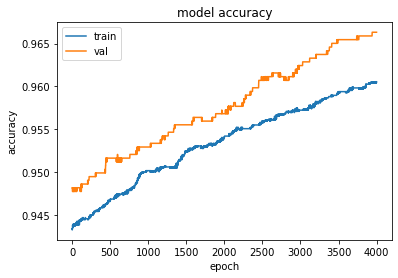

In [60]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 41ms/step
End-Effector Error: 0.1347


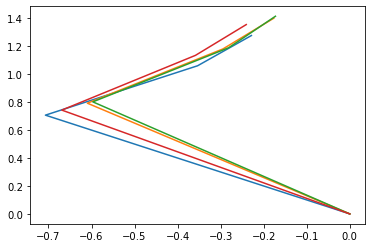

In [61]:
# Simple Forward Kinematics to produce input points to the neural net

# input the desired joint angles 
q1 = 135*(np.pi/180.0)
q2 = -90*(np.pi/180.0)
q3 = 15*(np.pi/180.0)

#forward kinematics of chosen joint angles, this is the 'correct' configuration
Xtru, Ytru, Q = ForwardKinematics(q1,q2,q3)

# input to neural network is the coordinate found from forward kinematics for the chosen joint angles
des = [[Xtru[3], Ytru[3], Q]]

# after training the model, the current weights are used to make a prediction on the input
ang = model.predict(des)
angRnd = modelRnd.predict(des)
angLarge = modelLarge.predict(des)

# forward kinematics of model predicted joint angles 
Xnn, Ynn, A = ForwardKinematics(ang[0][0], ang[0][1], ang[0][2])
XRnd, YRnd, Arnd = ForwardKinematics(angRnd[0][0], angRnd[0][1], angRnd[0][2])
Xlarge, Ylarge, Alarge = ForwardKinematics(angLarge[0][0], angLarge[0][1], angLarge[0][2])

plt.plot(Xtru, Ytru)
plt.plot(Xnn,Ynn)
plt.plot(XRnd, YRnd)
plt.plot(Xlarge, Ylarge)

Error = np.sqrt((Xnn[3] - Xtru[3])**2 + (Ynn[3] - Ytru[3])**2)
format_error = "{:.4f}".format(Error)
print('End-Effector Error: ' + str(format_error))

In [56]:
import tkinter as tk

def myfunction(event):
    x, y = event.x, event.y
    IN = [[x,y,np.pi]]
    ang = model.predict(IN)
    Xnn, Ynn, A = ForwardKinematics(ang[0][0], ang[0][1], ang[0][2], 100, 50, 25)
    
    canvas.create_line(250, 500, x,y)
    #canvas.create_line(250, 500, 100, 150)
    #canvas.create_line(250,500, Xnn[1], Ynn[1])
    #canvas.create_line(Xnn[1], Ynn[1], Xnn[2], Ynn[2])
    #canvas.create_line(Xnn[2], Ynn[2], Xnn[3], Ynn[3])
    
    

root = tk.Tk()

canvas = tk.Canvas(root, width=500, height=500)
canvas.pack()
canvas.old_coords = None

root.bind('<Motion>', myfunction)

root.mainloop()


1/1 [==============================] - 0s 42ms/step


In [44]:
Xnn

[0, -0.6046305298805237, -0.304158091545105, -0.18193621188402176]

In [45]:
Ynn

[0, 0.7965060472488403, 1.1961512863636017, 1.41423799097538]